# 지리정보함수1
<!-- 13-1 -->


In [1]:
import os
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# 12-1-2 시도정보 시각화 예제
warnings.filterwarnings(action='ignore')
plt.style.use('ggplot')

In [3]:
web_path= "C:/Users/jjjeo/OneDrive - UOS/class/2023 Data_Vis/Data/"
path_data = web_path+'LARD_ADM_SECT_SGG_11.shp'
seoul = gpd.read_file(path_data, encoding='cp949')

In [4]:
print(seoul.head())  # 데이터프레임 형태 확인

  ADM_SECT_C SGG_NM SGG_OID COL_ADM_SE  GID  \
0      11740    강동구    None      11740  125   
1      11710    송파구    None      11710  126   
2      11680    강남구    None      11680  127   
3      11650    서초구    None      11650  128   
4      11620    관악구    None      11620  129   

                                            geometry  
0  POLYGON ((971595.075 1952405.815, 971596.036 1...  
1  POLYGON ((965821.957 1949386.153, 965816.737 1...  
2  POLYGON ((959331.597 1948602.068, 959342.021 1...  
3  POLYGON ((956982.039 1947144.037, 956982.518 1...  
4  POLYGON ((949438.997 1944127.713, 949456.647 1...  


In [5]:
print(seoul.isna().sum())  # 결측치 확인

ADM_SECT_C     0
SGG_NM         0
SGG_OID       25
COL_ADM_SE     0
GID            0
geometry       0
dtype: int64


In [6]:
print(seoul.describe())  # 컬럼 별 데이터 요약치 확인

              GID
count   25.000000
mean   137.000000
std      7.359801
min    125.000000
25%    131.000000
50%    137.000000
75%    143.000000
max    149.000000


(933183.613281418, 973919.185795648, 1935149.4675647216, 1968503.2386949286)

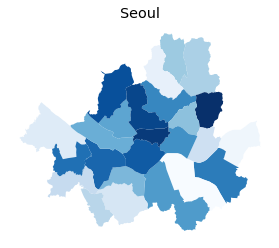

In [8]:
'''matplotlib 라이브러리는
pandas 클래스에서 시각화를 지원한다 (.plot 을 쓰면 바로 matplotlib 에서 axes 클래스로 바꿔줌)

geopandas 객체 역시 같은 방법으로 시각화가 가능하다
'''
seoul.plot(column='SGG_NM', cmap='Blues')
plt.title('Seoul')
plt.axis('off')

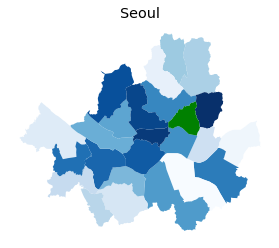

In [10]:
'''
행정구역중에서
동대문구만 초록색으로 표시해보자 
'''

dongdaemungu = seoul.loc[seoul['SGG_NM'] == '동대문구']

base = seoul.plot(column='SGG_NM', cmap='Blues')  # 행정구역별로 색을 다르게 한다.
base.set_title('Seoul')
base.set_axis_off()
dongdaemungu.plot(ax=base, color='green')
plt.show()  # 초록색으로 칠해진 곳이 동대문구이다.

이는 base 이라는 Axes 위에 dongdaemungu 를 덧대어 그린 것이다.
기준이 되는 polygon 을 먼저 Axes 로 설정하고 그 위에 새로운 객체들을 plot 하여 시각화하는 방법이
지리 정보 시각화에서 많이 사용된다.

matplotlib.axes 의 메소드는
https://matplotlib.org/stable/api/axes_api.html

을 참고하자.

"""
시각화할 때, 효과적인 시각화를 위해 color 설정을 알아보자

서울시 행정구역 데이터를 다시 로드한다
"""

<AxesSubplot:>

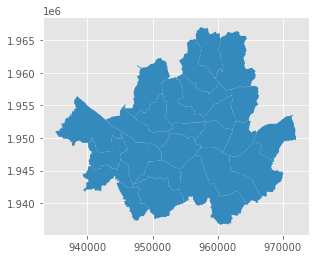

In [11]:
seoul = gpd.read_file(web_path+'LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
seoul.plot()

column을 지정하고 변수들에 따라 구분하여 색을 칠할 수 있는 것은 학습하였다. 이번엔 구분할 때 사용되는 color 을 직접 지정해볼 것이다.

matplotilb 는 단일 색상 외에도 많은 colormap 옵션을 지원한다, 색상표는

https://matplotlib.org/stable/tutorials/colors/colormaps.html 참고하여

색을 바꿔보자.

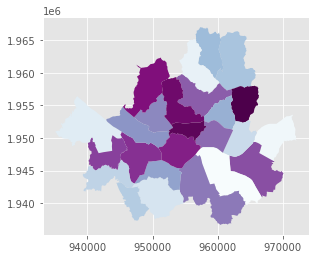

In [12]:
seoul.plot(column='SGG_NM', cmap='BuPu')
plt.show()

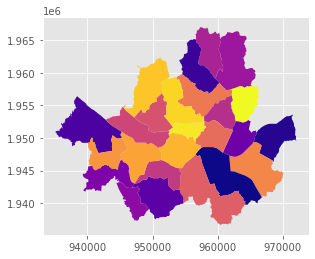

In [13]:
seoul.plot(column='SGG_NM', cmap='plasma')
plt.show()

지역에 따라 색을 달리하는 시각화는 수치형 변수를 표현할 때 더욱 유용하게 사용될 수 있다.

예를 들어, 행정인구별 인구수에 따라 컬러 맵을 만들면 데이터를 확인하기가 더 쉬울 것이다.
행정구역 별 가상 인구 데이터를 만들어서 시각화해보자

In [14]:
import numpy as np
np.random.seed(1)
seoul['population'] = np.random.randint(low=70000,high=300000,size=seoul.shape[0])

인구가 많이 늘어나면 과밀된 지역이라는 표시로, 인구가 많은 지역일수록
빨간색에 가깝게 해보자, cmap 중에서 'coolwarm' 을 선택하였다.

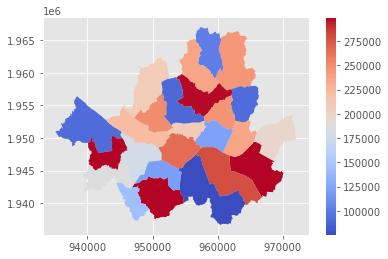

In [19]:
seoul.plot(column='population', cmap='coolwarm', legend=True)
plt.show()